In [52]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [111]:
mnist = tf.keras.datasets.mnist

(train_images, train_lables), (test_images, test_lables) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

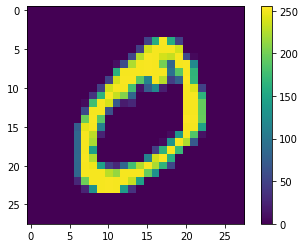

In [5]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

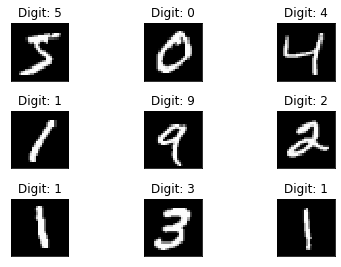

In [8]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [112]:
train_images = train_images / 255.0
test_images = test_images / 25.0

In [40]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(128,activation='relu'),
      keras.layers.Dense(128,activation='relu'),
      keras.layers.Dense(10,activation='softmax')
])

In [41]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.fit(train_images,train_lables,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6507 - accuracy: 0.8714
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3308 - accuracy: 0.9257
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2141 - accuracy: 0.9442
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1672 - accuracy: 0.9541
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1405 - accuracy: 0.9601
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1247 - accuracy: 0.9657
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1159 - accuracy: 0.9683
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1095 - accuracy: 0.9707
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0977 - accuracy: 0.9733
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.097

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


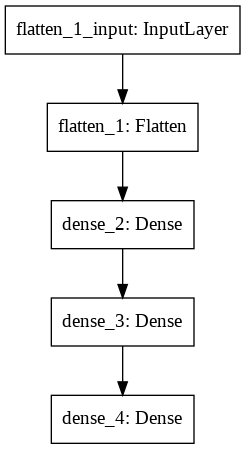

In [43]:
from tensorflow.keras.utils import plot_model
model.summary()
plot_model(model)

In [44]:
test_loss, test_acc = model.evaluate(test_images,test_lables,verbose=1)
print('Test Accuracy: ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1850 - accuracy: 0.9606
Test Accuracy:  0.9606000185012817


In [35]:
prediction = model.predict(test_images)

## Show some prediction

7


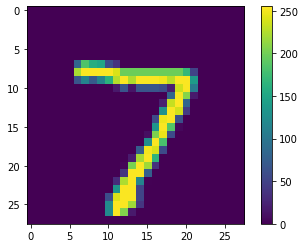

2


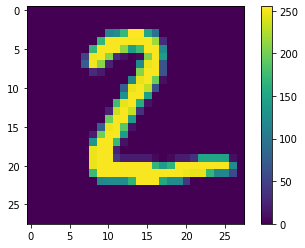

1


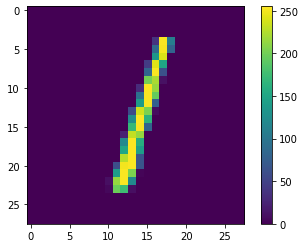

In [45]:
for i in range(3):
  print(np.argmax(prediction[i]))
  plt.figure()
  plt.imshow(test_images[i])
  plt.colorbar()
  plt.grid(False)
  plt.show()

##Functional Model

In [57]:
from tensorflow.keras import layers

#Input Layer

In [58]:
inputs = keras.Input(shape=(784,))
img_inputs = keras.Input(shape=(28, 28))

In [59]:
inputs.shape

TensorShape([None, 784])

#Hidden Layer & OutPut

In [60]:
dense = layers.Dense(128, activation="relu")
x = dense(inputs)

In [61]:
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(10)(x)

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


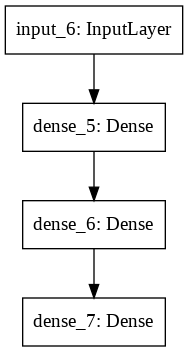

In [63]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()
keras.utils.plot_model(model)

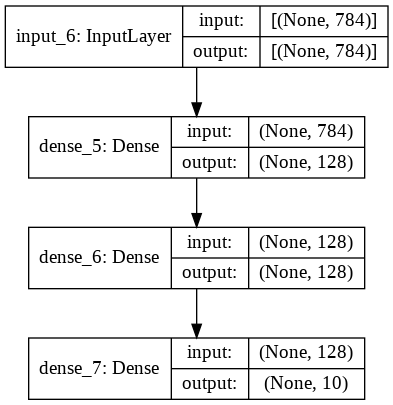

In [64]:
keras.utils.plot_model(model, show_shapes=True)

In [79]:
train_imagesF = train_images.reshape(60000, 784) / 255.0
test_imagesF = test_images.reshape(10000, 784) / 25.0

In [80]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

In [81]:
history = model.fit(train_imagesF, train_lables, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 6.7401 - accuracy: 0.9657 - val_loss: 5.4915 - val_accuracy: 0.9617
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 2.1435 - accuracy: 0.9668 - val_loss: 1.4405 - val_accuracy: 0.9530
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.5716 - accuracy: 0.9580 - val_loss: 0.5539 - val_accuracy: 0.9511
Epoch 4/10
750/750 [==============================] - 3s 3ms/step - loss: 0.2744 - accuracy: 0.9621 - val_loss: 0.4150 - val_accuracy: 0.9544
Epoch 5/10
750/750 [==============================] - 3s 3ms/step - loss: 0.1910 - accuracy: 0.9682 - val_loss: 0.3941 - val_accuracy: 0.9606
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1480 - accuracy: 0.9733 - val_loss: 0.3589 - val_accuracy: 0.9603
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1168 - accuracy: 0.9768 - val_loss: 0.3731 - val_accuracy: 0.9650
Epoch 

In [77]:
test_loss, test_acc = model.evaluate(test_imagesF,test_lables,verbose=1)
print('Test Accuracy: ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 6.4446 - accuracy: 0.9500
Test Accuracy:  0.949999988079071


## Show some prediction

7


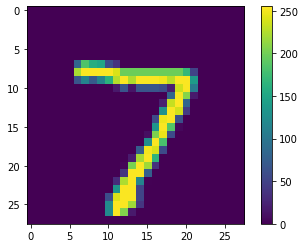

2


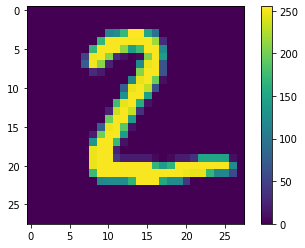

1


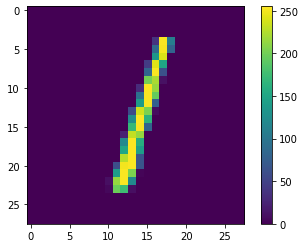

In [82]:
for i in range(3):
  print(np.argmax(prediction[i]))
  plt.figure()
  plt.imshow(test_images[i])
  plt.colorbar()
  plt.grid(False)
  plt.show()

##Model Sub-Classing

In [118]:
class Custom_Model(tf.keras.Model):
    def __init__(self):
        super(Custom_Model, self).__init__()
        self.flatten= tf.keras.layers.Flatten()
        self.dense1= tf.keras.layers.Dense(128, activation='relu')
        self.dense2= tf.keras.layers.Dense(128, activation='relu')
        self.dense3= tf.keras.layers.Dense(10, activation='softmax')
    def call(self, inputs):
        x= self.flatten(inputs)
        x= self.dense1(x)
        x= self.dense2(x)
        x= self.dense3(x)
        return x

#Create & Compile Mode

In [119]:
model= Custom_Model()

In [120]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [121]:
model.fit(train_images,train_lables,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2282 - accuracy: 0.9324
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0976 - accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0657 - accuracy: 0.9796
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0522 - accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0397 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0326 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0269 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0233 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0200 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.018

In [122]:
test_loss, test_acc = model.evaluate(test_images,test_lables,verbose=1)
print('Test Accuracy: ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.7831 - accuracy: 0.9796
Test Accuracy:  0.9796000123023987


In [123]:
prediction = model.predict(test_images)

7


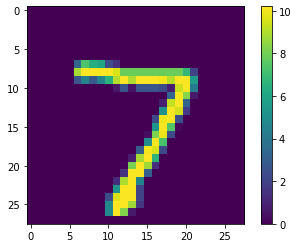

2


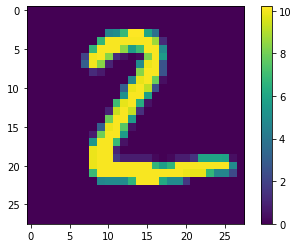

1


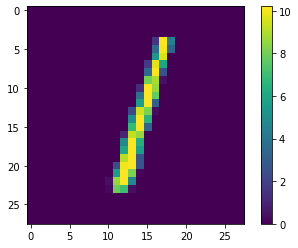

In [124]:
for i in range(3):
  print(np.argmax(prediction[i]))
  plt.figure()
  plt.imshow(test_images[i])
  plt.colorbar()
  plt.grid(False)
  plt.show()